<a href="https://colab.research.google.com/github/jomorenoba/Clase-de-Herramientas-para-Ciencia-de-Datos/blob/master/Tarea4MD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget 'https://raw.githubusercontent.com/jomorenoba/Clase-de-Herramientas-para-Ciencia-de-Datos/master/owid-covid-data.csv'
!wget 'https://raw.githubusercontent.com/jomorenoba/Clase-de-Herramientas-para-Ciencia-de-Datos/master/nba_logreg.csv'
!wget 'https://raw.githubusercontent.com/jomorenoba/Clase-de-Herramientas-para-Ciencia-de-Datos/master/Immunotherapy.csv'

--2020-10-30 03:13:13--  https://raw.githubusercontent.com/jomorenoba/Clase-de-Herramientas-para-Ciencia-de-Datos/master/owid-covid-data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11496841 (11M) [text/plain]
Saving to: ‘owid-covid-data.csv.1’

owid-covid-data.csv 100%[===================>]  10.96M  20.3MB/s    in 0.5s    

2020-10-30 03:13:14 (20.3 MB/s) - ‘owid-covid-data.csv.1’ saved [11496841/11496841]

--2020-10-30 03:13:14--  https://raw.githubusercontent.com/jomorenoba/Clase-de-Herramientas-para-Ciencia-de-Datos/master/nba_logreg.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected

In [ ]:
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install scikit-learn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
url='https://raw.githubusercontent.com/jomorenoba/Clase-de-Herramientas-para-Ciencia-de-Datos/master/owid-covid-data.csv'
data=pd.read_csv(url)
array=data.values
atributos=array[:,0:40]
clase=array[:,40]
data

iso_code continent  ... life_expectancy human_development_index
0          AFG      Asia  ...           64.83                   0.498
1          AFG      Asia  ...           64.83                   0.498
2          AFG      Asia  ...           64.83                   0.498
3          AFG      Asia  ...           64.83                   0.498
4          AFG      Asia  ...           64.83                   0.498
...        ...       ...  ...             ...                     ...
52217      NaN       NaN  ...             NaN                     NaN
52218      NaN       NaN  ...             NaN                     NaN
52219      NaN       NaN  ...             NaN                     NaN
52220      NaN       NaN  ...             NaN                     NaN
52221      NaN       NaN  ...             NaN                     NaN

[52222 rows x 41 columns]

In [ ]:
data.describe()

total_cases      new_cases  ...  life_expectancy  human_development_index
count  2.090000e+02     209.000000  ...       209.000000               209.000000
mean   3.976738e+05    4479.507177  ...        71.930191                 0.597584
std    3.044040e+06   33273.181091  ...        12.497349                 0.291455
min    3.000000e+00       0.000000  ...         0.000000                 0.000000
25%    1.423000e+03       3.000000  ...        67.440000                 0.498000
50%    1.139100e+04      61.000000  ...        74.790000                 0.699000
75%    7.957400e+04     812.000000  ...        78.800000                 0.802000
max    4.227908e+07  468117.000000  ...        86.750000                 0.953000

[8 rows x 26 columns]

In [ ]:
maxdate=data['date'].max()
maxdate

'2020-10-24'

In [ ]:
data=data[data['date']==maxdate]
threshhold=data.isna().sum().max()/2
data=data.dropna(thresh=threshhold,axis=1)  
data.fillna(0,inplace=True)
data

iso_code continent  ... life_expectancy human_development_index
298         AFG      Asia  ...           64.83                   0.498
528         ALB    Europe  ...           78.57                   0.785
827         DZA    Africa  ...           76.88                   0.754
1058        AND    Europe  ...           83.73                   0.858
1275        AGO    Africa  ...           61.15                   0.581
...         ...       ...  ...             ...                     ...
51185       YEM      Asia  ...           66.12                   0.452
51405       ZMB    Africa  ...           63.89                   0.588
51623       ZWE    Africa  ...           61.49                   0.535
51922  OWID_WRL         0  ...           72.58                   0.000
52221         0         0  ...            0.00                   0.000

[209 rows x 30 columns]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


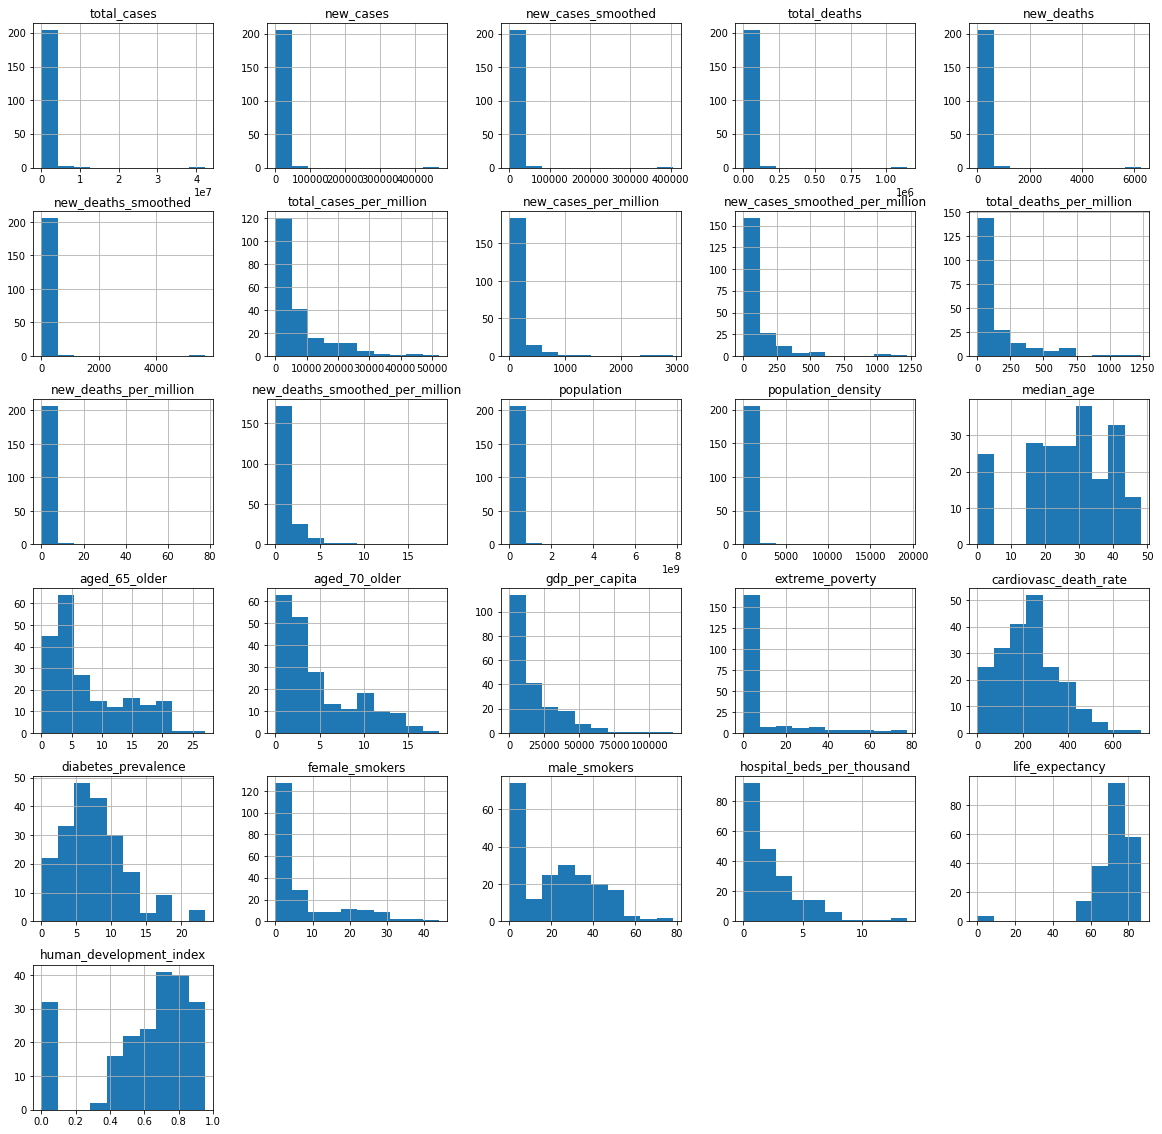

In [ ]:
#Histograma
fig1=plt.figure(figsize=(20,20))
axes=fig1.gca()
data.hist(ax=axes)
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


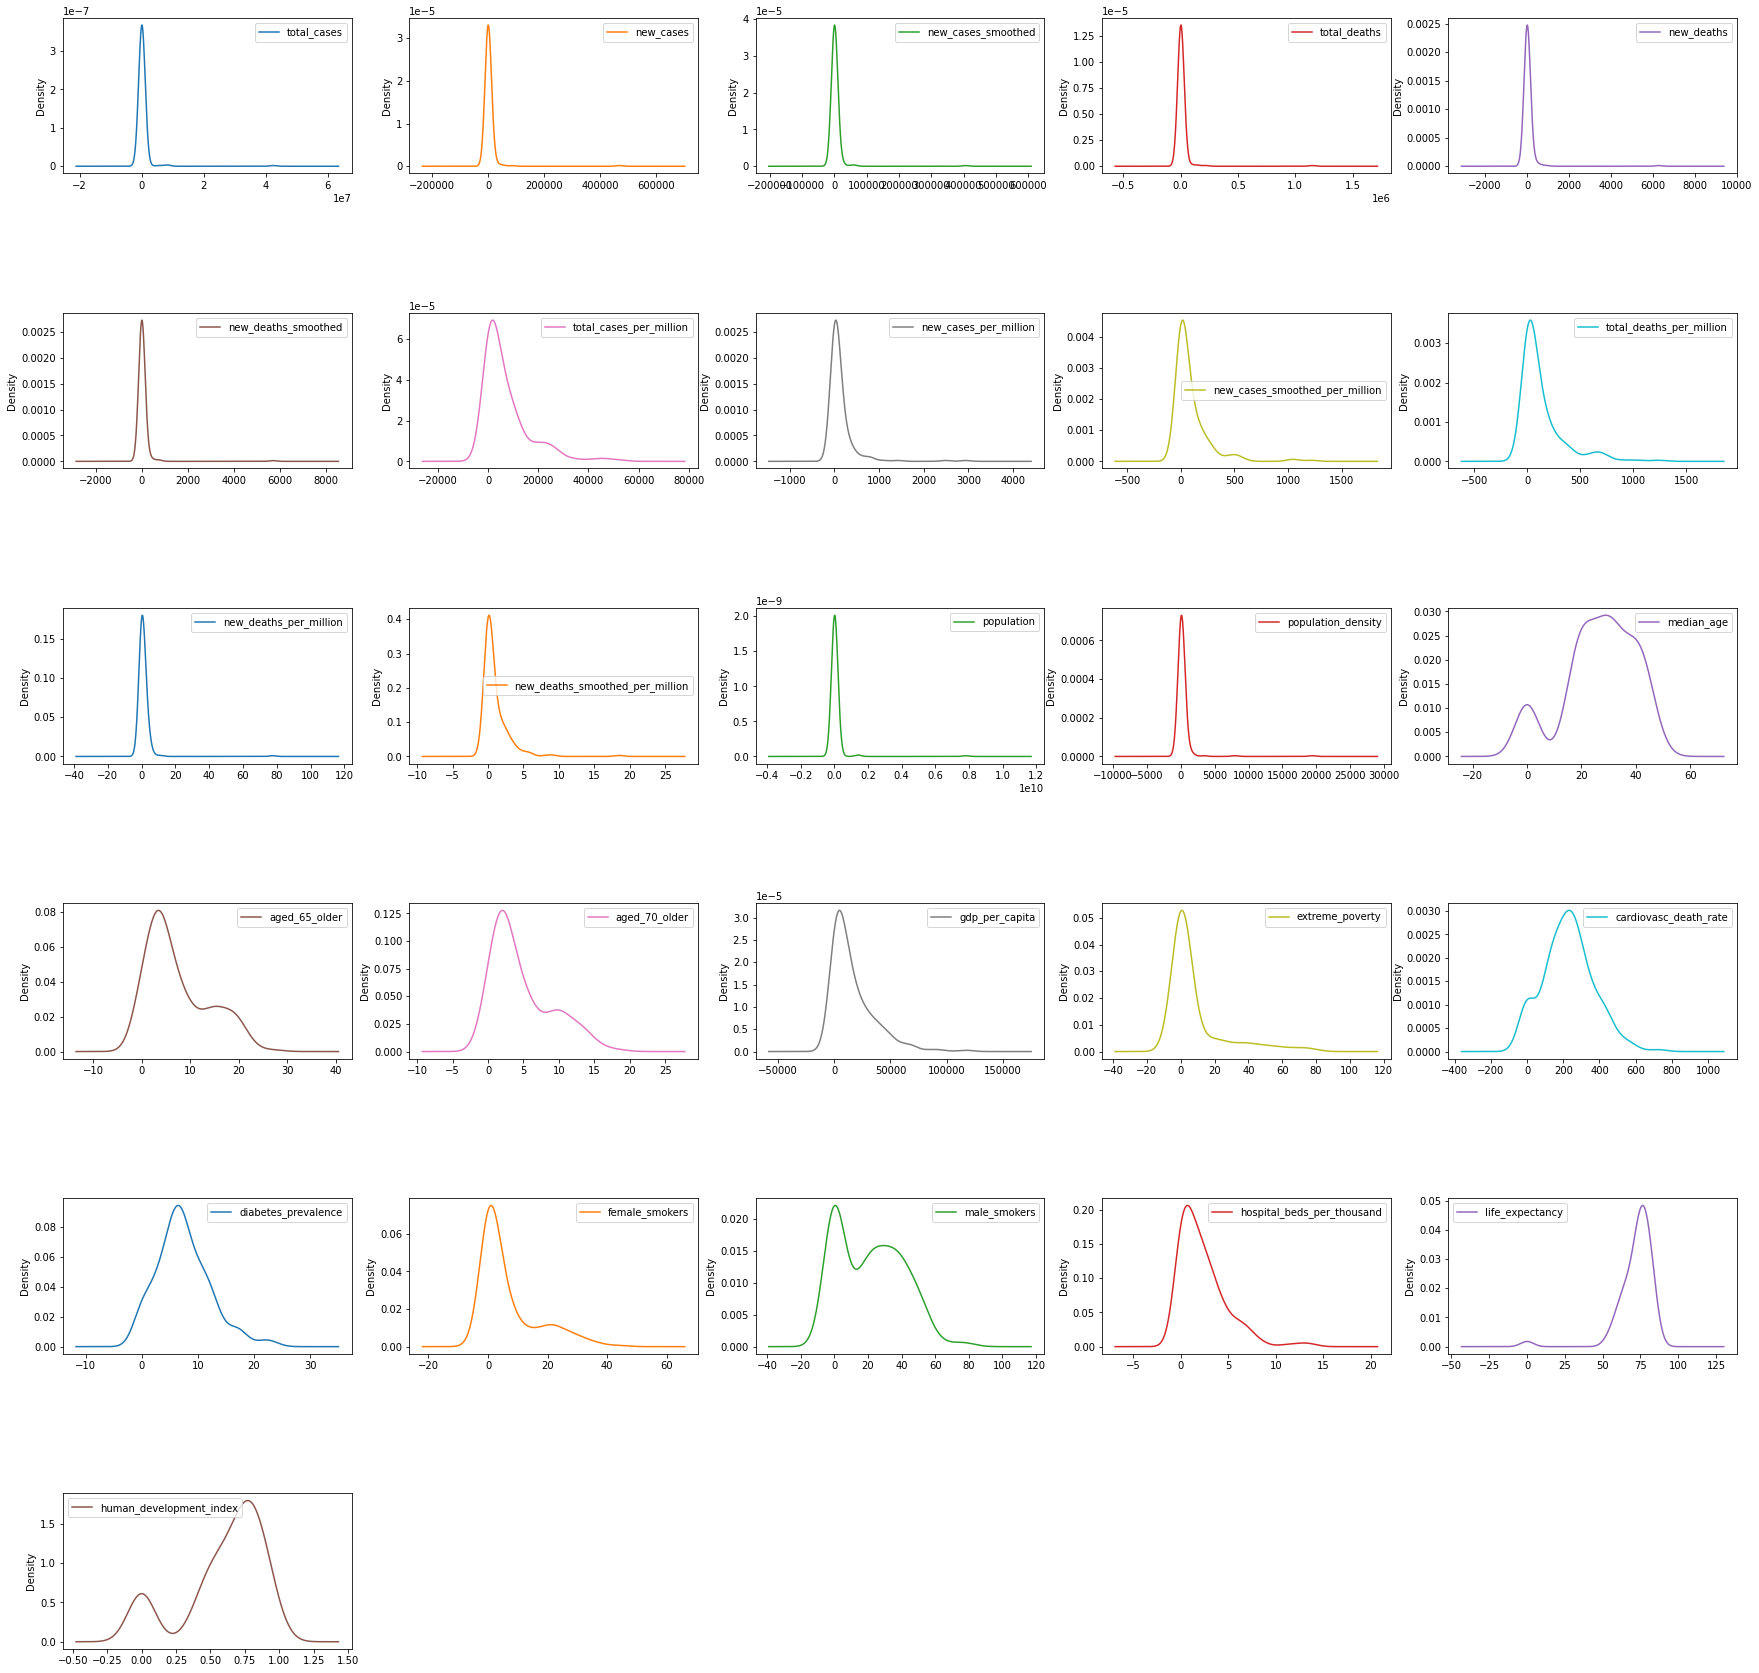

In [ ]:
#Diagrama de Densidad
import math 
col=data.shape[1]
y=5
x=math.ceil(col/5)
fig2=plt.figure(figsize=(30,30))
axes2=fig2.gca()
data.plot(ax=axes2,kind='density',subplots=True,layout=(x,y))
plt.subplots_adjust(hspace=0.9)
plt.show()

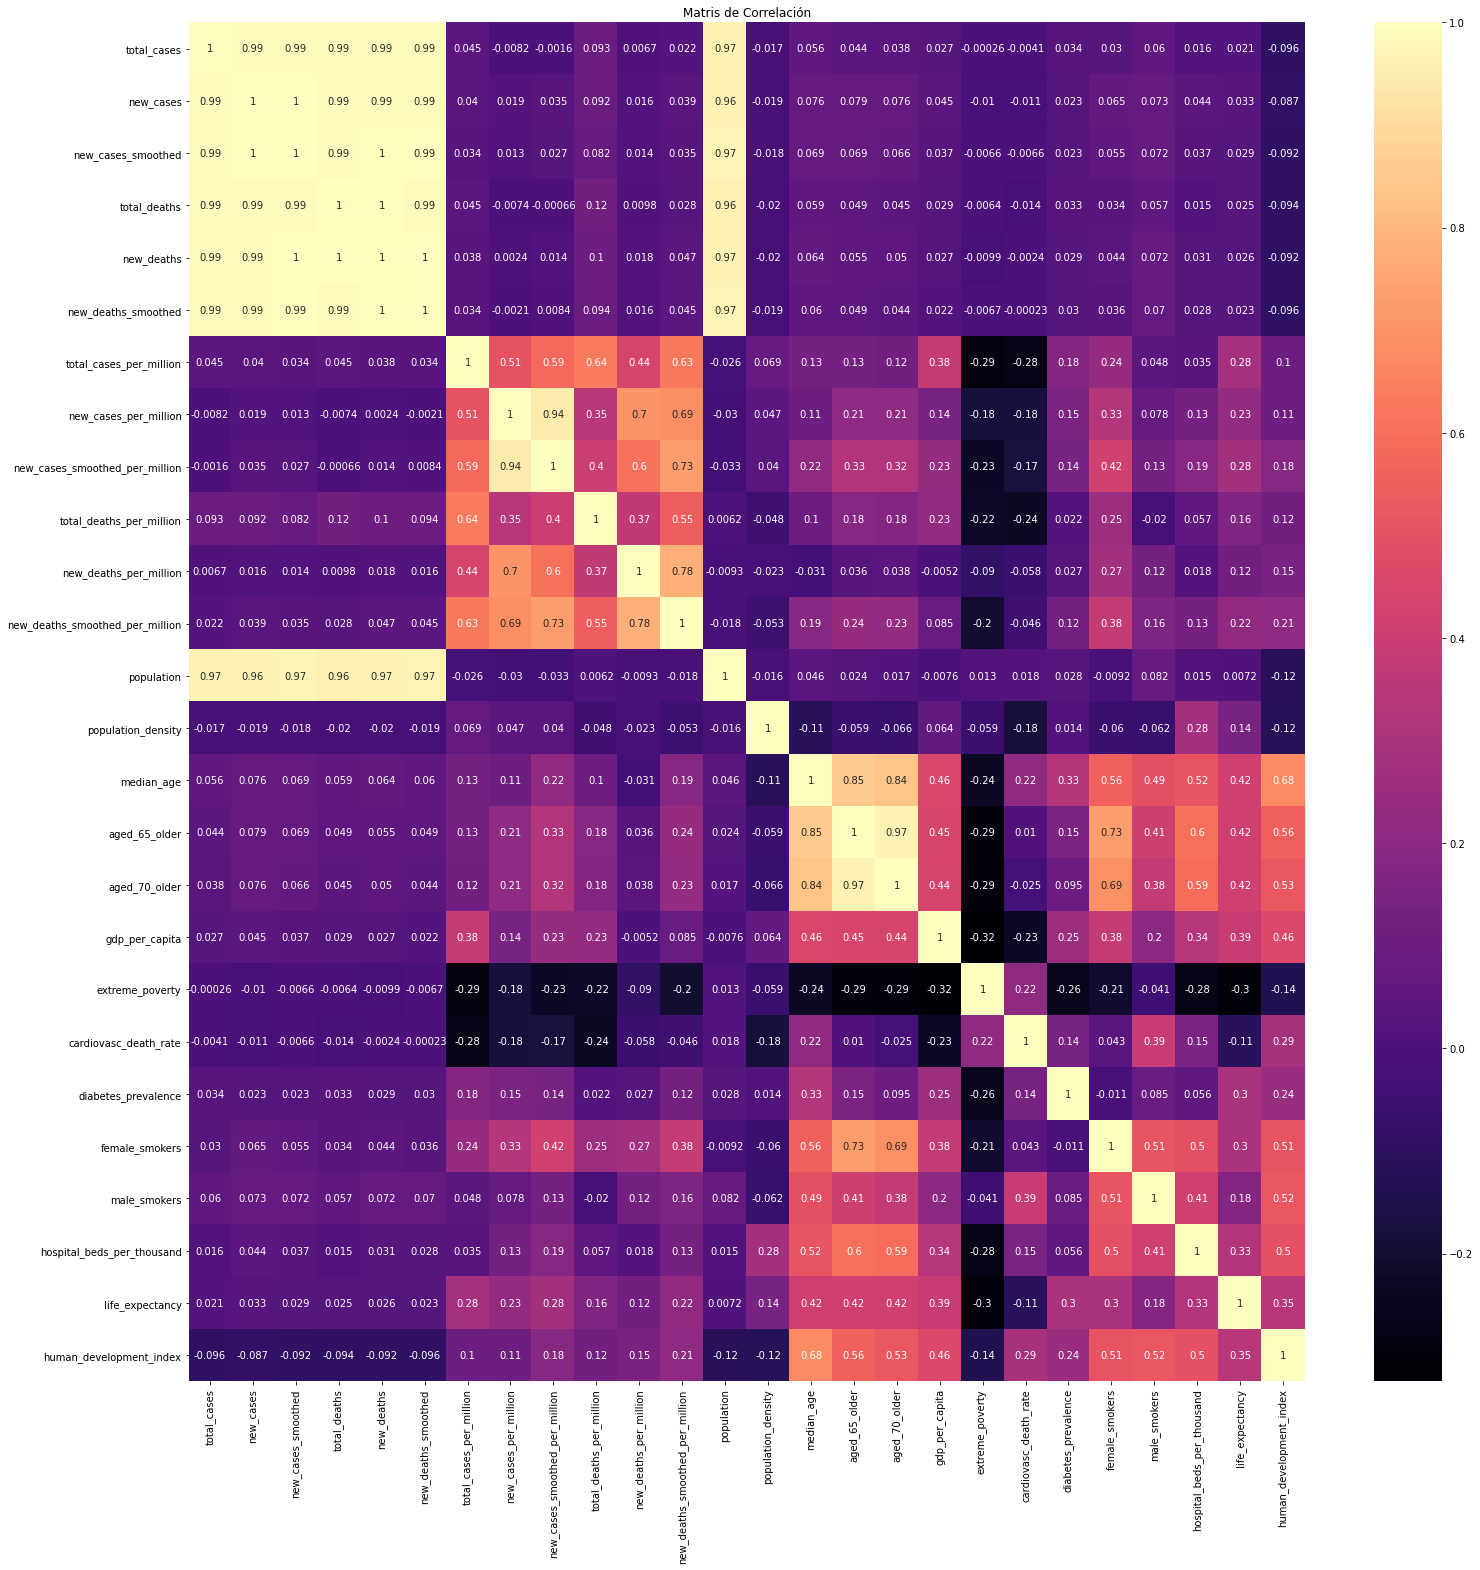

In [ ]:
#Matriz de correlación
cor=data.corr()
fig3=plt.figure(figsize=(25,25))
axes3=sn.heatmap(cor,annot=True,cmap='magma')
plt.title('Matris de Correlación')
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


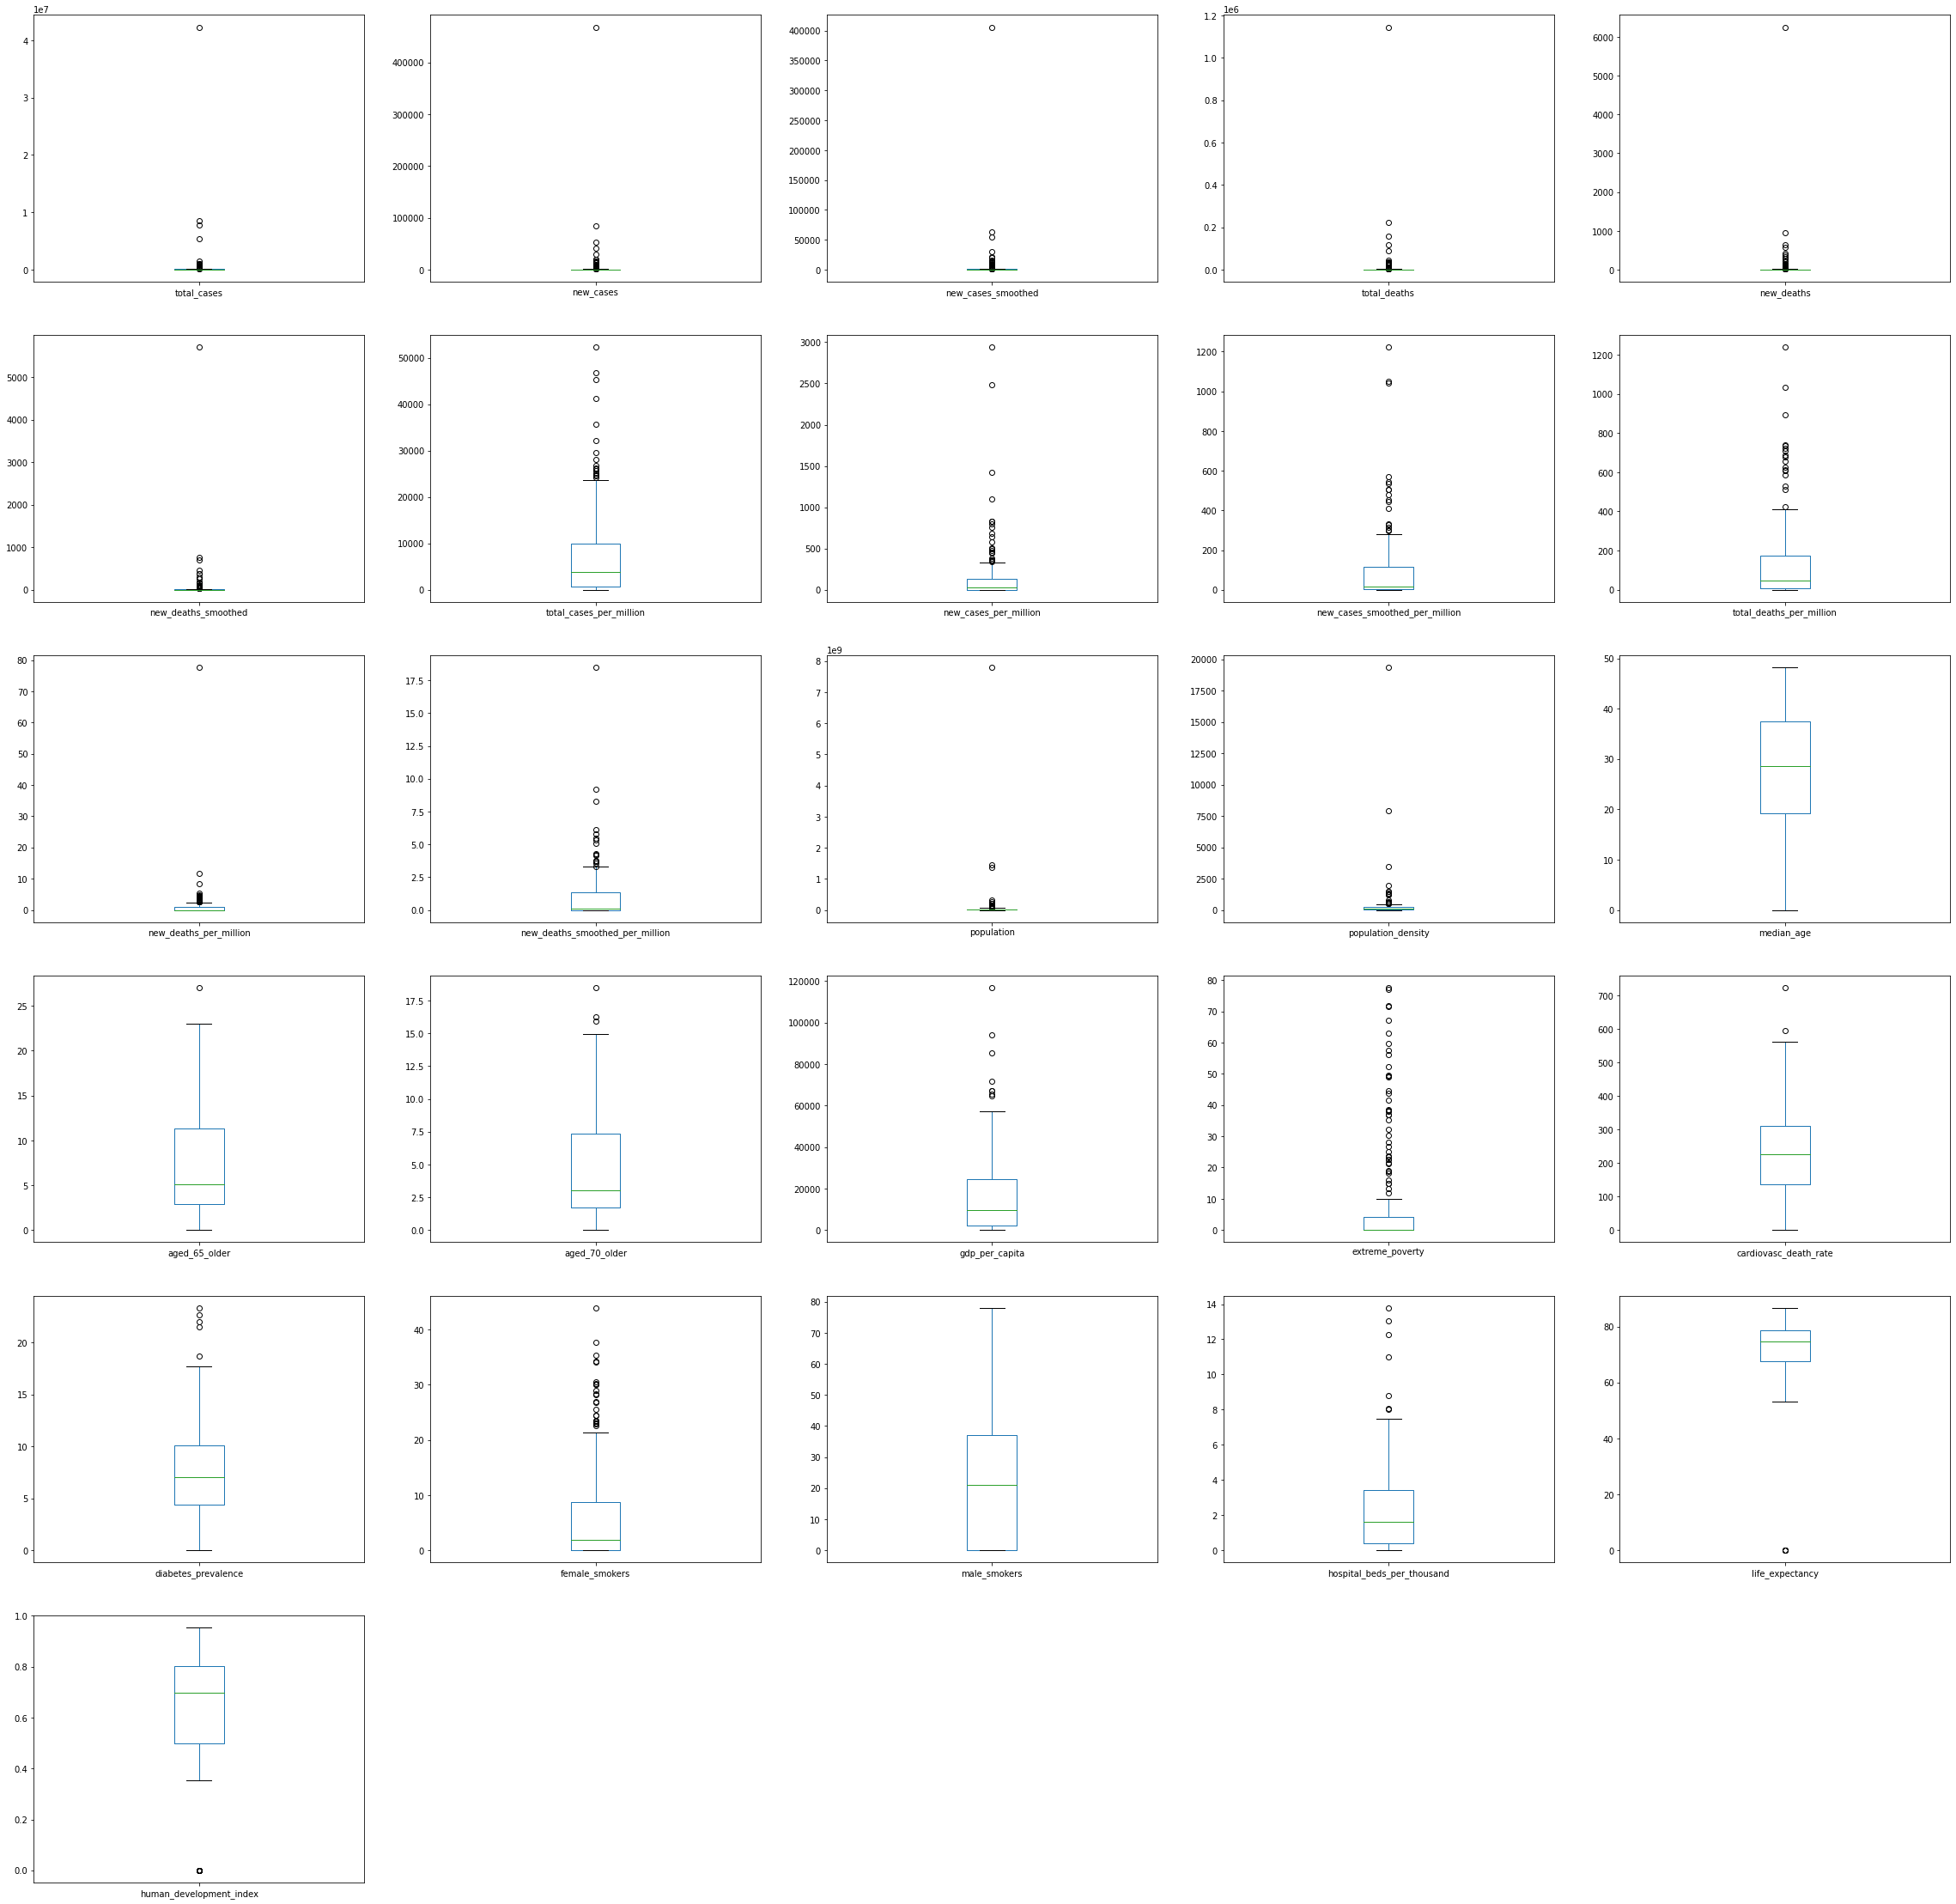

In [ ]:
#Boxplot
fig4=plt.figure(figsize=(40,40))
axes4=fig4.gca()
data.plot(ax=axes4,kind='box',subplots=True,layout=(x,y))
plt.show()

In [ ]:
url2='https://raw.githubusercontent.com/jomorenoba/Clase-de-Herramientas-para-Ciencia-de-Datos/master/nba_logreg.csv'
data2=pd.read_csv(url2)
data2.fillna(0)
array=data2.values
atributos2=array[:,1:20]
clase2=array[:,20]
data2

Name  GP   MIN  PTS  FGM  ...  AST  STL  BLK  TOV  TARGET_5Yrs
0      Brandon Ingram  36  27.4  7.4  2.6  ...  1.9  0.4  0.4  1.3          0.0
1     Andrew Harrison  35  26.9  7.2  2.0  ...  3.7  1.1  0.5  1.6          0.0
2      JaKarr Sampson  74  15.3  5.2  2.0  ...  1.0  0.5  0.3  1.0          0.0
3         Malik Sealy  58  11.6  5.7  2.3  ...  0.8  0.6  0.1  1.0          1.0
4         Matt Geiger  48  11.5  4.5  1.6  ...  0.3  0.3  0.4  0.8          1.0
...               ...  ..   ...  ...  ...  ...  ...  ...  ...  ...          ...
1335      Chris Smith  80  15.8  4.3  1.6  ...  2.5  0.6  0.2  0.8          0.0
1336      Brent Price  68  12.6  3.9  1.5  ...  2.3  0.8  0.0  1.3          1.0
1337     Marlon Maxey  43  12.1  5.4  2.2  ...  0.3  0.3  0.4  0.9          0.0
1338  Litterial Green  52  12.0  4.5  1.7  ...  2.2  0.4  0.1  0.8          1.0
1339        Jon Barry  47  11.7  4.4  1.6  ...  1.4  0.7  0.1  0.9          1.0

[1340 rows x 21 columns]

In [ ]:
#Escalamiento
from sklearn.preprocessing import MinMaxScaler
escalamiento=MinMaxScaler(feature_range=(0,1))
reescalamiento=escalamiento.fit_transform(atributos2)
np.set_printoptions(precision=2)
print(reescalamiento)

[[0.35 0.64 0.24 ... 0.16 0.1  0.28]
 [0.34 0.63 0.24 ... 0.44 0.13 0.35]
 [0.89 0.32 0.16 ... 0.2  0.08 0.21]
 ...
 [0.45 0.24 0.17 ... 0.12 0.1  0.19]
 [0.58 0.24 0.14 ... 0.16 0.03 0.16]
 [0.51 0.23 0.13 ... 0.28 0.03 0.19]]


In [ ]:
#Estandarización
from sklearn.preprocessing import StandardScaler
escalamiento2=StandardScaler().fit(atributos2)
reescalamiento2=escalamiento2.transform(atributos2)
print(reescalamiento2)

[[-1.4   1.18  0.14 ... -0.53  0.07  0.15]
 [-1.46  1.12  0.09 ...  1.18  0.31  0.56]
 [ 0.78 -0.28 -0.37 ... -0.29 -0.16 -0.27]
 ...
 [-1.   -0.67 -0.32 ... -0.78  0.07 -0.41]
 [-0.48 -0.68 -0.53 ... -0.53 -0.63 -0.54]
 [-0.77 -0.71 -0.55 ...  0.2  -0.63 -0.41]]


In [ ]:
#Normalización
from sklearn.preprocessing import Normalizer
data2 =data2[~data2.isin([np.nan, np.inf, -np.inf]).any(1)]
array=data2.values
atributosn=array[:,1:20]
escalamiento3=Normalizer().fit(atributosn)
normalizacion=escalamiento3.transform(atributosn)
print(normalizacion)
normalizacion

[[0.38 0.29 0.08 ... 0.   0.   0.01]
 [0.36 0.28 0.07 ... 0.01 0.01 0.02]
 [0.66 0.14 0.05 ... 0.   0.   0.01]
 ...
 [0.45 0.13 0.06 ... 0.   0.   0.01]
 [0.55 0.13 0.05 ... 0.   0.   0.01]
 [0.48 0.12 0.05 ... 0.01 0.   0.01]]


array([[0.38, 0.29, 0.08, ..., 0.  , 0.  , 0.01],
       [0.36, 0.28, 0.07, ..., 0.01, 0.01, 0.02],
       [0.66, 0.14, 0.05, ..., 0.  , 0.  , 0.01],
       ...,
       [0.45, 0.13, 0.06, ..., 0.  , 0.  , 0.01],
       [0.55, 0.13, 0.05, ..., 0.  , 0.  , 0.01],
       [0.48, 0.12, 0.05, ..., 0.01, 0.  , 0.01]])

In [ ]:
#Validación Cruzada en base a un modelo
#Modelo Regresión Logística
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
array=data2.values
atributos2=array[:,1:20]
clase2=array[:,20]
escalamienton=Normalizer().fit(atributos2)
normalizacion=escalamienton.transform(atributos2)
y=clase2.astype('int')
kfold=KFold(n_splits=10, shuffle=True)
model= LogisticRegression(solver='lbfgs',max_iter=10000)
modelo=model.fit(atributos2,y)
resultados=cross_val_score(model,normalizacion,y,cv=kfold,scoring='accuracy')
print(f'Accuracy:{resultados.mean()*100.0:,.2f}% STD:{resultados.std()*100.0:,.2f}%')

Accuracy:67.49% STD:3.19%


In [ ]:
#División por Porcentaje
#67% Para Entrenamiento y 33% para prueba
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
tamaño_prueba=0.30
atributos_train,atributos_prueba,clase_train, clase_prueba=train_test_split(normalizacion,y,test_size=tamaño_prueba,random_state=1)
modelo2=LogisticRegression(solver='lbfgs',max_iter=10000)
modelo2.fit(atributos_train,clase_train)
resultados2=modelo2.score(atributos_prueba,clase_prueba)
print(f'Accuracy:{resultados2.mean()*100.0:,.2f}%')

Accuracy:64.41%


In [ ]:
#Métrica KAPPA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score
tamaño_prueba=0.30
atributos_train,atributos_prueba,clase_train, clase_prueba=train_test_split(normalizacion,y,test_size=tamaño_prueba,random_state=1)
modelo4=LogisticRegression(solver='lbfgs',max_iter=10000)
modelo4.fit(atributos_train,clase_train)
predict=modelo4.predict(atributos_prueba)
KAPPA=cohen_kappa_score(clase_prueba,predict)
print(f'Accuracy KAPPA:{KAPPA*100.0:,.2f}%')

Accuracy KAPPA:21.28%


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
kfold=KFold(n_splits=10, shuffle=True)
modelo5=LogisticRegression(solver='lbfgs',max_iter=10000)
results=cross_val_score(modelo5,normalizacion,y,cv=kfold,scoring='roc_auc')
print(f'AUC: {results.mean()*100.0:,.2f}%  {results.std()*100.0:,.2f}%')

AUC: 72.80%  5.77%


In [ ]:
#Matriz de Confusión
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split #Para probar el model con validación cruzada
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
X_train, X_test, Y_train, Y_test=train_test_split(normalizacion,y,test_size=0.33,random_state=1)
model= LogisticRegression(solver='lbfgs',max_iter=10000)
model.fit(X_train,Y_train)
predicted=model.predict(X_test)
precision_score=precision_score(Y_test, predicted)
confusion_matrix=confusion_matrix(Y_test, predicted)
accuracy_score(Y_train,model.predict(X_train))
accuracy_score1=accuracy_score(Y_test, predicted)
recall_score=recall_score(Y_test, predicted)
f1_score=f1_score(Y_test, predicted)
print(confusion_matrix)
print(f'Accuracy: {accuracy_score1*100:.2f} %')#Observaciones Correctamente Predecidas
print(f'Precision: {precision_score*100:.2f} %')#Cuantos Verdaderos Positivos son Predecidos Correctamente
print(f'Recall Score: {recall_score*100:.2f} %')#De la Proporción de la clase, cuantos fueron predecidos corretamente
print(f'F1: {f1_score*100:.2f} %')#Promedio ponderado, se utiliza cuando Falsos Positivos y Falsos Negativos son similares

[[ 62 117]
 [ 38 222]]
Accuracy: 64.69 %
Precision: 65.49 %
Recall Score: 85.38 %
F1: 74.12 %


In [ ]:
#Correlación distribución entre atributos corr()
Correlation=data2.corr(method='pearson')
Correlation

GP       MIN       PTS  ...       BLK       TOV  TARGET_5Yrs
GP           1.000000  0.590596  0.539069  ...  0.276700  0.518693     0.397783
MIN          0.590596  1.000000  0.911746  ...  0.401011  0.826431     0.316031
PTS          0.539069  0.911746  1.000000  ...  0.390496  0.850272     0.314632
FGM          0.543000  0.902864  0.990874  ...  0.400744  0.834343     0.316393
FGA          0.517395  0.910194  0.979676  ...  0.325503  0.845952     0.290684
FG%          0.296987  0.208341  0.261587  ...  0.390786  0.126429     0.235587
3P Made      0.108195  0.389474  0.345289  ... -0.155955  0.257015     0.035025
3PA          0.099626  0.402814  0.355198  ... -0.169245  0.282496     0.016151
3P%          0.038209  0.165997  0.151072  ... -0.242274  0.108277    -0.003411
FTM          0.483185  0.791089  0.896245  ...  0.412565  0.804762     0.295546
FTA          0.480136  0.779813  0.880826  ...  0.473501  0.798856     0.296018
FT%          0.197743  0.236160  0.254404  ... -0.160008  0.195242     0.095621
OREB         0.400184  0.573655  0.576421  ...  0.649201  0.422708     0.294637
DREB         0.467467  0.747065  0.696560  ...  0.687627  0.572049     0.285673
REB          0.460390  0.710853  0.679002  ...  0.699615  0.538216     0.300491
AST          0.374311  0.629147  0.551561  ... -0.083851  0.747442     0.173788
STL          0.452726  0.757050  0.674937  ...  0.136144  0.742301     0.228931
BLK          0.276700  0.401011  0.390496  ...  1.000000  0.284679     0.211751
TOV          0.518693  0.826431  0.850272  ...  0.284679  1.000000     0.270767
TARGET_5Yrs  0.397783  0.316031  0.314632  ...  0.211751  0.270767     1.000000

[20 rows x 20 columns]

Text(0.5, 1.0, 'Matriz de Correlación')

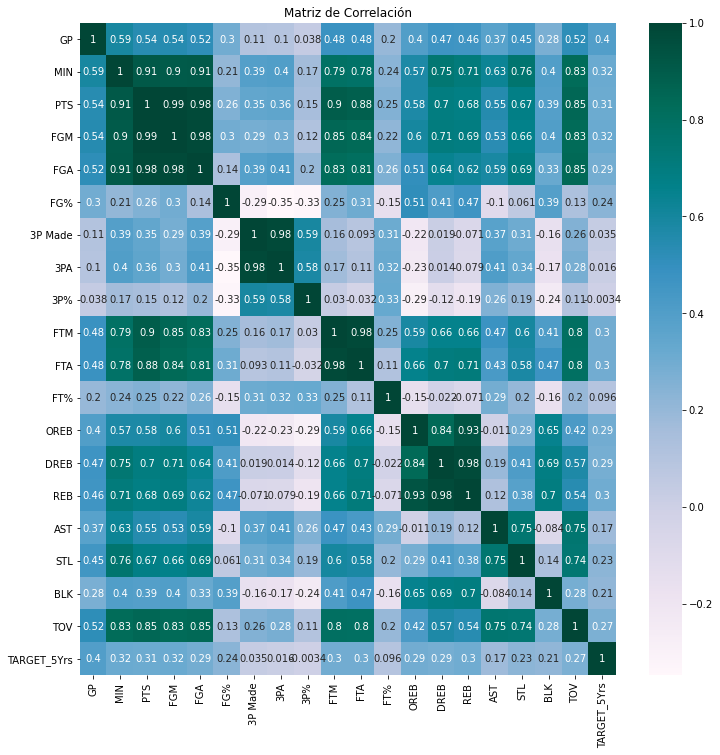

In [ ]:
figura1=plt.figure(figsize=(12,12))
ax=sn.heatmap(Correlation,annot=True,cmap='PuBuGn')
plt.title('Matriz de Correlación')

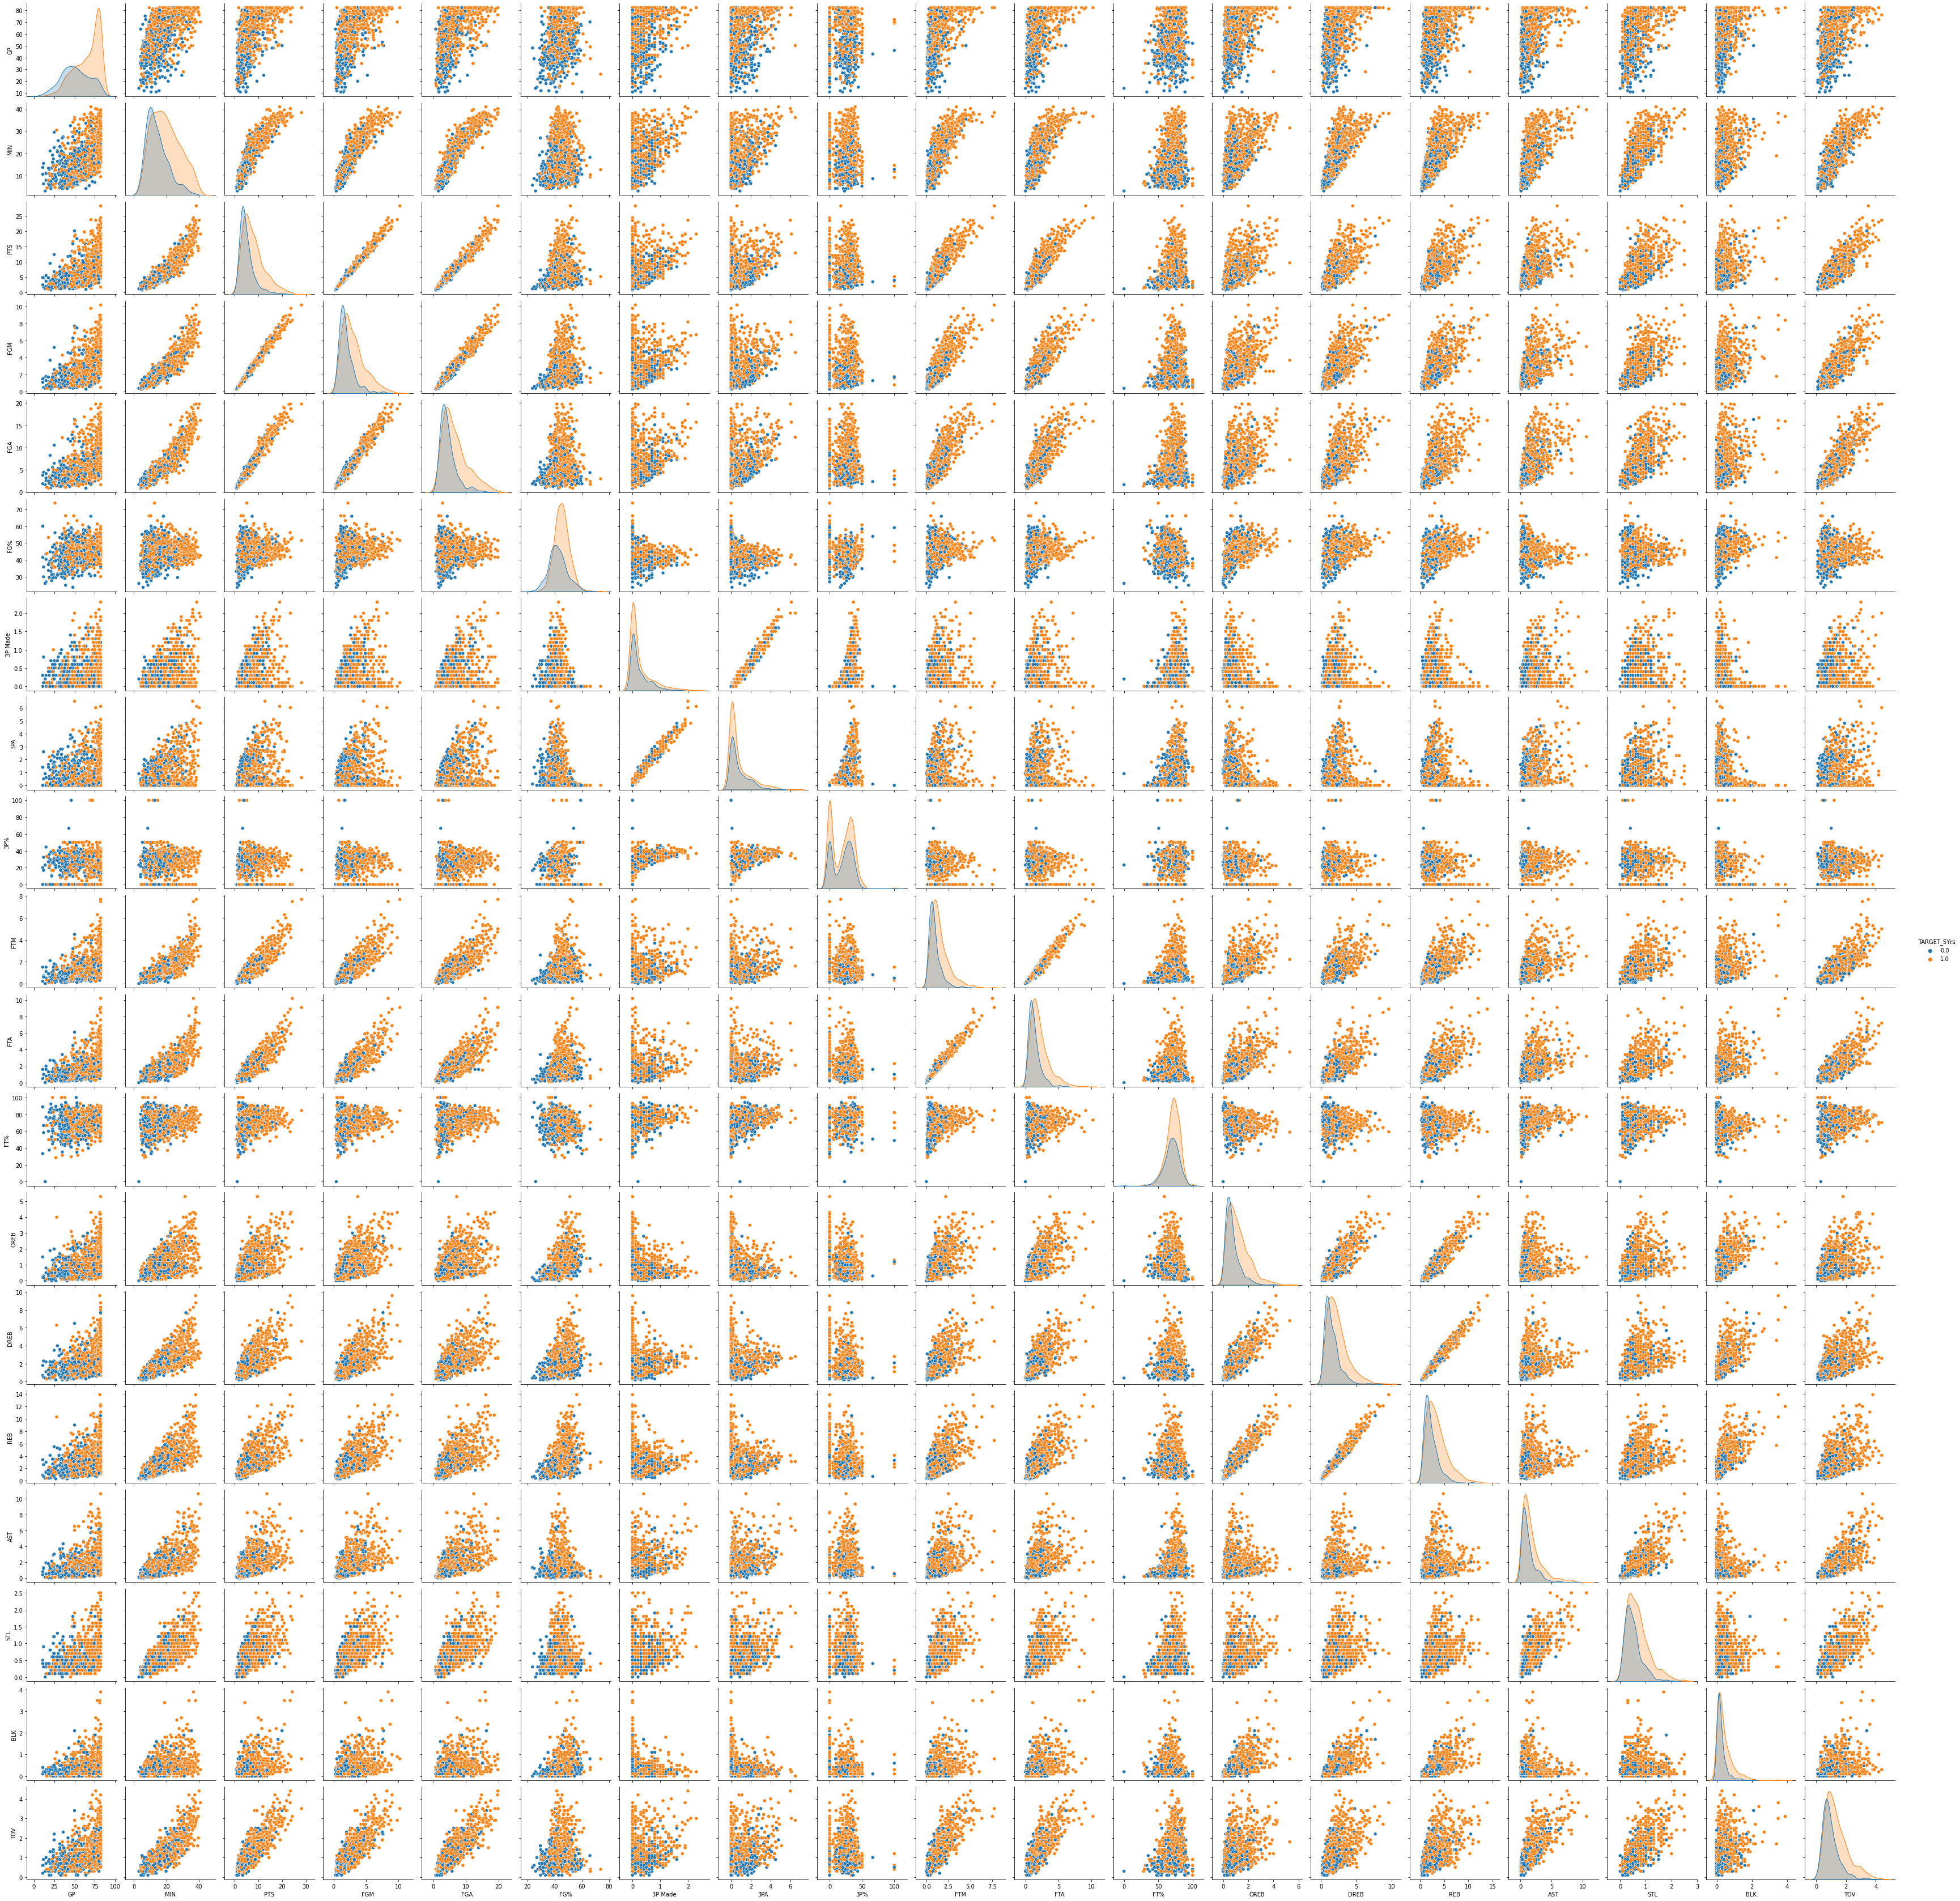

In [ ]:
sn.pairplot(data2,hue='TARGET_5Yrs')

In [ ]:
url3='https://raw.githubusercontent.com/jomorenoba/Clase-de-Herramientas-para-Ciencia-de-Datos/master/Immunotherapy.csv'
data3=pd.read_csv(url3)
data3
array=data3.values
atributos3=array[:,0:7]
clase3=array[:,7]
data3

sex  age   Time  ...  Area  induration_diameter  Result_of_Treatment
0     1   22   2.25  ...    51                   50                    1
1     1   15   3.00  ...   900                   70                    1
2     1   16  10.50  ...   100                   25                    1
3     1   27   4.50  ...    80                   30                    1
4     1   20   8.00  ...    45                    8                    1
..  ...  ...    ...  ...   ...                  ...                  ...
85    1   40   5.50  ...    69                    5                    1
86    1   38   7.50  ...    56                   45                    1
87    1   46  11.50  ...    91                   25                    0
88    1   32  12.00  ...    43                   50                    0
89    2   23   6.75  ...    19                    2                    1

[90 rows x 8 columns]

In [ ]:
#Validación Cruzada en base a un modelo
#Modelo Regresión Logística
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
kfold=KFold(n_splits=10, shuffle=True)#,random_state=7
modelo=LogisticRegression(solver='lbfgs',max_iter=1000)
resultados=cross_val_score(modelo,atributos3,clase3,cv=kfold,scoring='accuracy')
print(f'Accuracy:{resultados.mean()*100.0:,.2f}% STD:{resultados.std()*100.0:,.2f}%')

Accuracy:81.11% STD:13.19%


In [ ]:
#División por Porcentaje
#67% Para Entrenamiento y 33% para prueba
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
tamaño_prueba=0.30
atributos_train,atributos_prueba,clase_train, clase_prueba=train_test_split(atributos3,clase3,test_size=tamaño_prueba,random_state=1)
modelo2=LogisticRegression(solver='lbfgs',max_iter=1000)
modelo2.fit(atributos_train,clase_train)
resultados2=modelo2.score(atributos_prueba,clase_prueba)
print(f'Accuracy:{resultados2.mean()*100.0:,.2f}%')

Accuracy:77.78%


In [ ]:
#Métrica KAPPA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score
tamaño_prueba=0.30
atributos_train,atributos_prueba,clase_train, clase_prueba=train_test_split(atributos3,clase3,test_size=tamaño_prueba,random_state=1)
modelo4=LogisticRegression(solver='lbfgs',max_iter=1000)
modelo4.fit(atributos_train,clase_train)
predict=modelo4.predict(atributos_prueba)
KAPPA=cohen_kappa_score(clase_prueba,predict)
print(f'Accuracy KAPPA:{KAPPA*100.0:,.2f}%')

Accuracy KAPPA:19.80%


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
kfold=KFold(n_splits=10, shuffle=True)
modelo5=LogisticRegression(solver='lbfgs',max_iter=1000)
results=cross_val_score(modelo5,atributos3,clase3,cv=kfold,scoring='roc_auc')
print(f'AUC: {results.mean()*100.0:,.2f}%  {results.std()*100.0:,.2f}%')

AUC: 70.69%  25.67%


In [ ]:
#Matriz de Confusión
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split #Para probar el model con validación cruzada
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
array_reg=data3.values
X_reg=array_reg[:,0:7]
Y_reg=array_reg[:,7]
X_train, X_test, Y_train, Y_test=train_test_split(X_reg,Y_reg,test_size=0.33,random_state=1)
model= LogisticRegression(solver='lbfgs',max_iter=1000)
model.fit(X_train,Y_train)
predicted=model.predict(X_test)
precision_score=precision_score(Y_test, predicted)
confusion_matrix=confusion_matrix(Y_test, predicted)
accuracy_score(Y_train,model.predict(X_train))
accuracy_score1=accuracy_score(Y_test, predicted)
recall_score=recall_score(Y_test, predicted)
f1_score=f1_score(Y_test, predicted)
print(confusion_matrix)
print(f'Accuracy: {accuracy_score1*100:.2f} %')#Observaciones Correctamente Predecidas
print(f'Precision: {precision_score*100:.2f} %')#Cuantos Verdaderos Positivos son Predecidos Correctamente
print(f'Recall Score: {recall_score*100:.2f} %')#De la Proporción de la clase, cuantos fueron predecidos corretamente
print(f'F1: {f1_score*100:.2f} %')#Promedio ponderado, se utiliza cuando Falsos Positivos y Falsos Negativos son similares

[[ 1  7]
 [ 0 22]]
Accuracy: 76.67 %
Precision: 75.86 %
Recall Score: 100.00 %
F1: 86.27 %


In [ ]:
#Correlación distribución entre atributos corr()
Correlation2=data3.corr(method='pearson')
Correlation2

sex  ...  Result_of_Treatment
sex                  1.000000  ...             0.018831
age                  0.043682  ...            -0.188314
Time                -0.014825  ...            -0.361172
Number_of_Warts      0.100785  ...            -0.047160
Type                -0.104623  ...             0.083396
Area                -0.115664  ...             0.043349
induration_diameter  0.015202  ...            -0.031273
Result_of_Treatment  0.018831  ...             1.000000

[8 rows x 8 columns]

Text(0.5, 1.0, 'Matriz de Correlación')

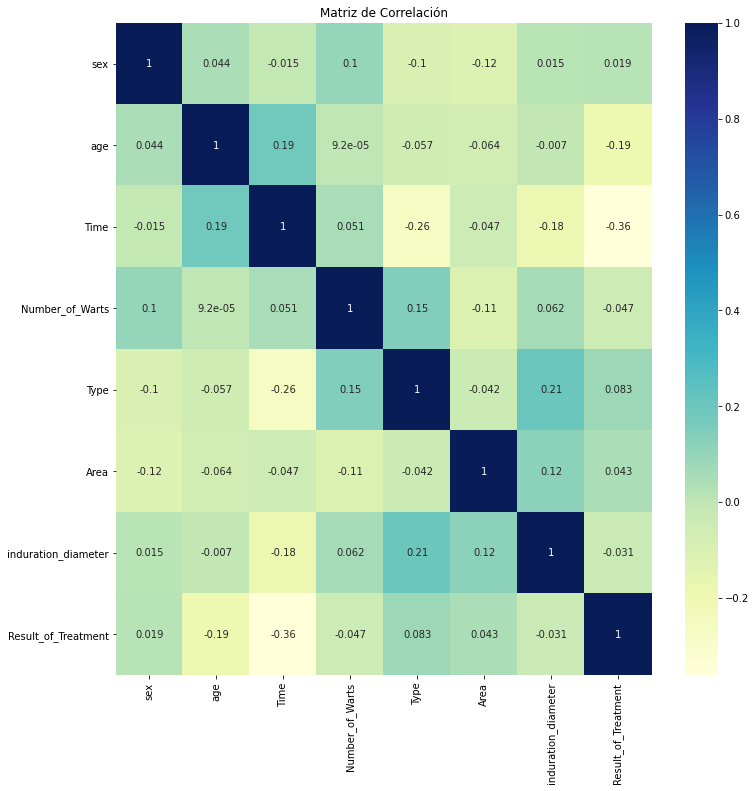

In [ ]:
figura2=plt.figure(figsize=(12,12))
ax=sn.heatmap(Correlation2,annot=True,cmap='YlGnBu')
plt.title('Matriz de Correlación')

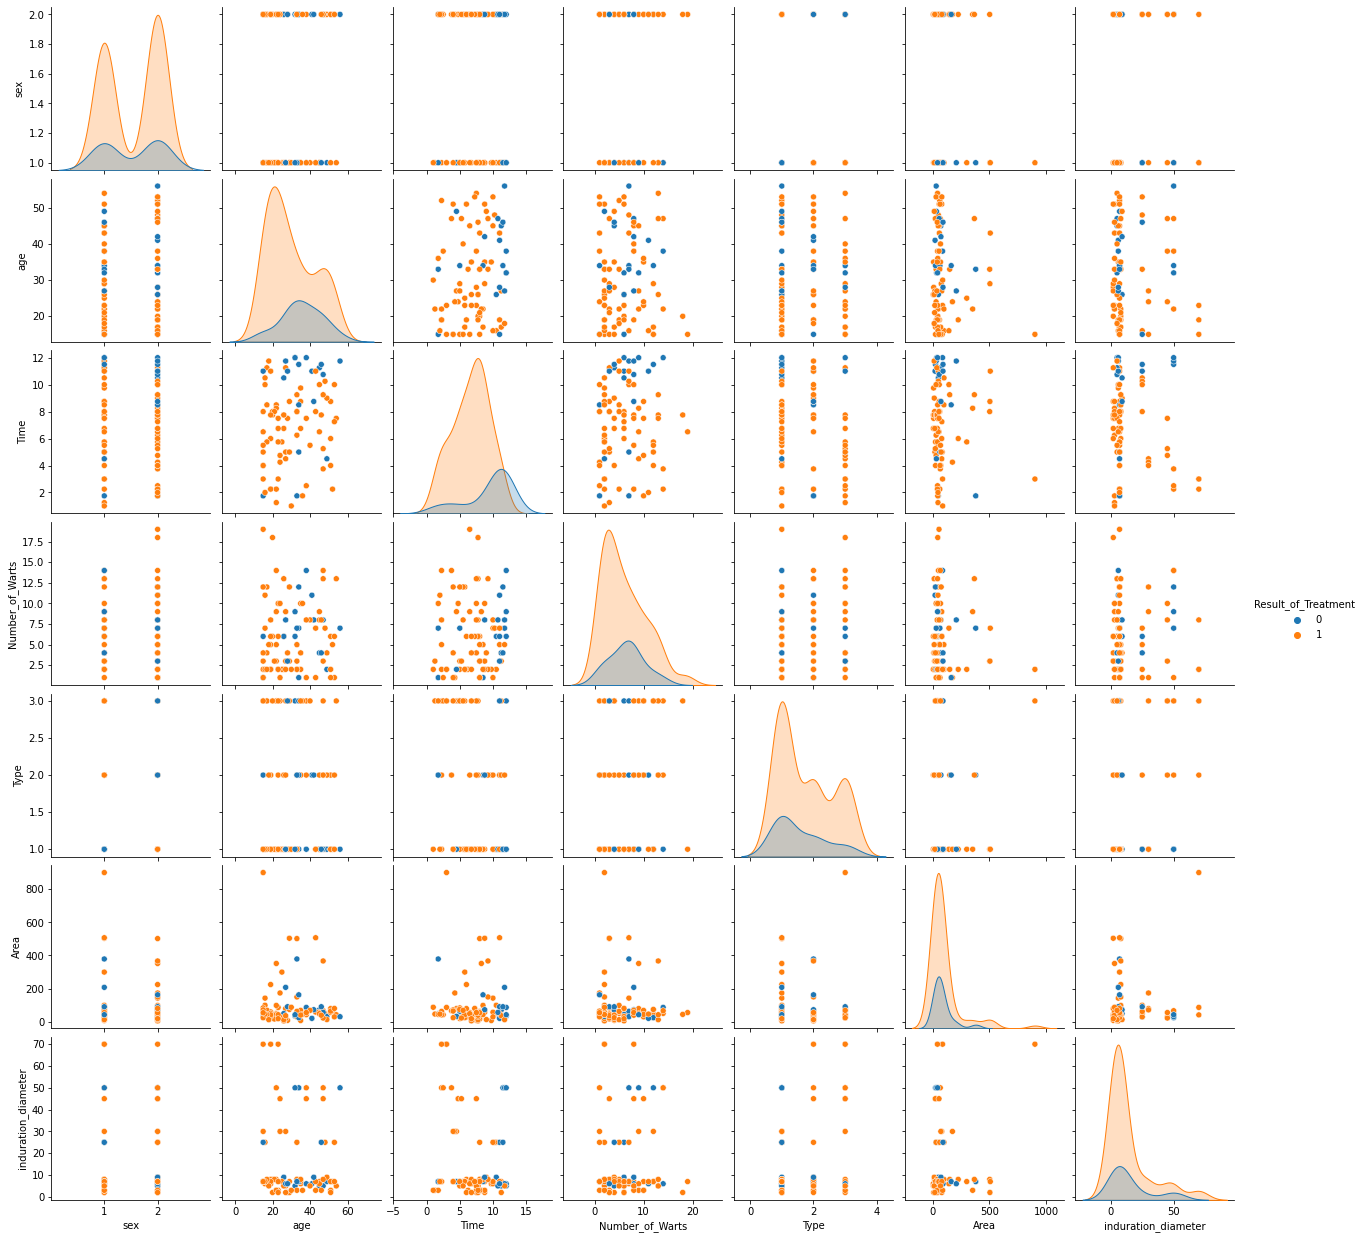

In [ ]:
sn.pairplot(data3,hue='Result_of_Treatment')